In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})

In [120]:
%matplotlib inline
from IPython.display import display
lianjia_df = pd.read_csv('house_bj.csv')
lianjia_df.index

RangeIndex(start=0, stop=659, step=1)

In [121]:
lianjia_df.info()#查看缺失值
lianjia_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 12 columns):
0            659 non-null int64
东城区          659 non-null object
前门东大街        659 non-null object
2室1厅         659 non-null object
59.5         659 non-null float64
东北           659 non-null object
精装           659 non-null object
中楼层(共16层)    659 non-null object
1979年        659 non-null object
崇文门          659 non-null object
528          659 non-null float64
88740        659 non-null int64
dtypes: float64(2), int64(2), object(8)
memory usage: 61.9+ KB


,0,东城区,前门东大街,2室1厅,59.5,东北,精装,中楼层(共16层),1979年,崇文门,528,88740
0,1,东城区,华龙美晟,2室1厅,80.23,东,精装,高楼层(共12层),2009年,永定门,615.0,76655
1,2,东城区,柏林寺西,2室1厅,58.45,南,简装,中楼层(共16层),1994年,和平里,640.0,109496
2,3,东城区,南水关,2室1厅,62.05,南北,简装,中楼层(共14层),1989年,广渠门,570.0,91862
3,4,东城区,华龙美晟,2室1厅,81.38,西北,简装,中楼层(共12层),2009年,永定门,610.0,74957
4,5,东城区,新景家园东区,1室1厅,56.16,南,简装,低楼层(共13层),2006年,崇文门,710.0,126425


In [122]:
lianjia_df.describe() #查看统计信息
lianjia_df=pd.DataFrame(lianjia_df.values,columns=['kong','城区','位置','房型','面积','朝向','装修','楼层','时间','地标','总价','单价'])
lianjia_df.drop(['kong'],axis=1,inplace=True)
lianjia_df.head()

,城区,位置,房型,面积,朝向,装修,楼层,时间,地标,总价,单价
0,东城区,华龙美晟,2室1厅,80.23,东,精装,高楼层(共12层),2009年,永定门,615,76655
1,东城区,柏林寺西,2室1厅,58.45,南,简装,中楼层(共16层),1994年,和平里,640,109496
2,东城区,南水关,2室1厅,62.05,南北,简装,中楼层(共14层),1989年,广渠门,570,91862
3,东城区,华龙美晟,2室1厅,81.38,西北,简装,中楼层(共12层),2009年,永定门,610,74957
4,东城区,新景家园东区,1室1厅,56.16,南,简装,低楼层(共13层),2006年,崇文门,710,126425


In [123]:
df = lianjia_df.copy()
df['PerPrice'] = lianjia_df['总价']/lianjia_df['面积']

In [124]:
columns = ['城区','位置','房型','面积','朝向','装修','楼层','时间','地标','单价','总价','PerPrice']
df = pd.DataFrame(df, columns = columns)
df.to_csv('data.csv')


In [118]:
display(df.head(n=2))

,城区,位置,房型,面积,朝向,装修,楼层,时间,地标,单价,总价,PerPrice
0,东城区,华龙美晟,2室1厅,80.23,东,精装,NaN,2009,永定门,76655,615.0,7.66546
1,东城区,柏林寺西,2室1厅,58.45,南,简装,NaN,1994,和平里,109496,640.0,10.9495


In [85]:
df_house_count = df.groupby('城区')['总价'].count().sort_values(ascending=False).to_frame().reset_index()

In [71]:
df['单价'] = df['单价'].apply(pd.to_numeric) #将列中数据转为数字
df['总价'] = df['总价'].apply(pd.to_numeric) 
df_house_mean = df.groupby('城区')['单价'].mean().sort_values(ascending=False).to_frame().reset_index()
df_housezong=df.groupby('城区')['总价'].mean().sort_values(ascending=False).to_frame().reset_index()

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


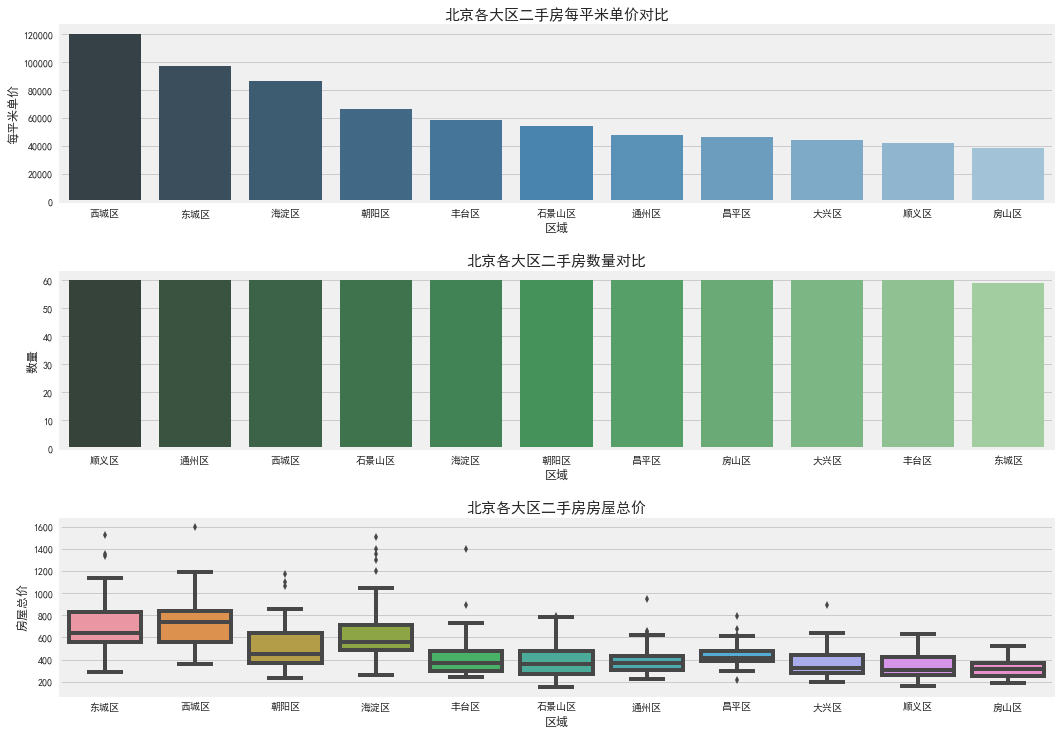

In [83]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(15,10))
plt.subplots_adjust(left=0.04, top= 0.96, right = 0.96, bottom = 0.03, wspace = 0.01, hspace = 0.4)#调整子图间距离
sns.barplot(x='城区', y='单价', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='城区', y='总价', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('北京各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='城区', y='总价', data=df, ax=ax3)
ax3.set_title('北京各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')
plt.show()

In [90]:
df['时间']=df['时间'].map(lambda x: x[0:4])

In [92]:
df['时间'] = df['时间'].apply(pd.to_numeric) 

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


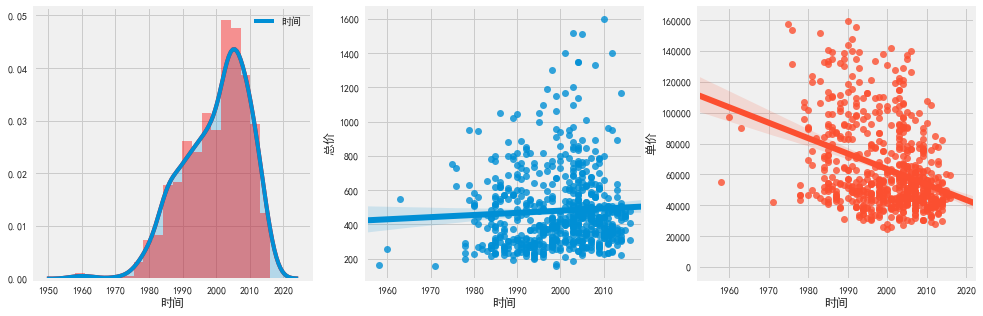

In [96]:
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(15,5))
#探究时间和总价的关系，那些时间的二手房最多
sns.distplot(df['时间'],bins=20,ax=ax1,color='r')
sns.kdeplot(df['时间'],shade=True,ax=ax1)
sns.regplot(x='时间',y='总价',data=df,ax=ax2)
sns.regplot(x='时间',y='单价',data=df,ax=ax3)
plt.show()

Layout特征分析

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


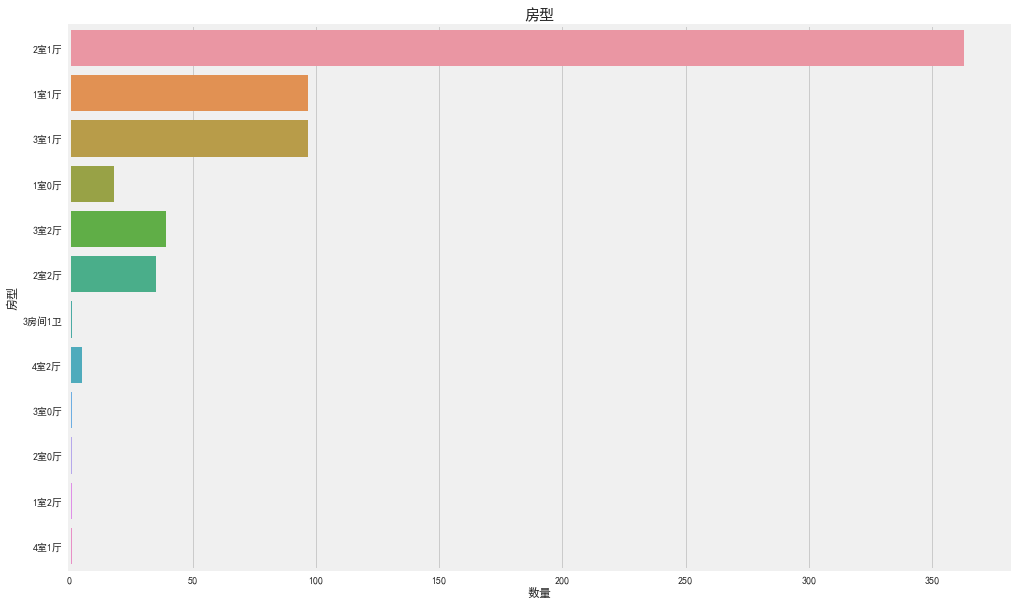

In [99]:
f,ax1=plt.subplots(figsize=(15,10))
sns.countplot(y='房型',data=df,ax=ax1)
ax1.set_title('房型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('房型')
plt.show()

In [101]:
df['装修'].value_counts()

精装    354
简装    296
毛坯      9
Name: 装修, dtype: int64

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


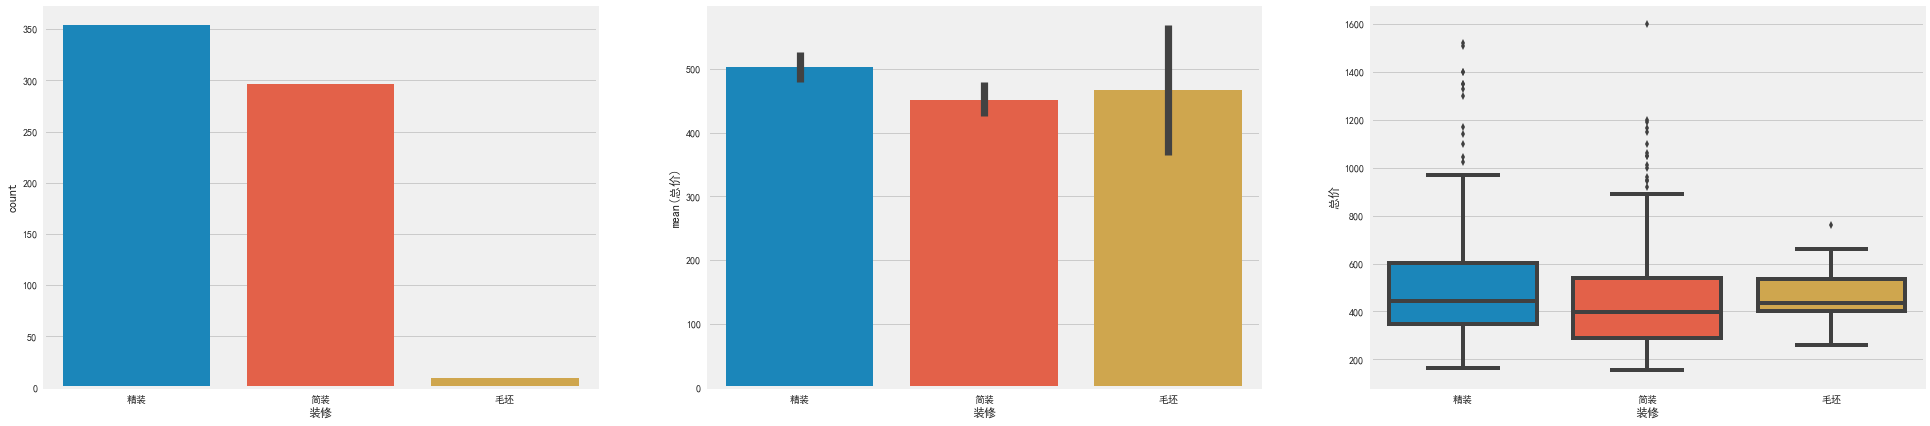

In [107]:
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(30,7))
sns.countplot(df['装修'],ax=ax1)
sns.barplot(x='装修',y='总价',data=df,ax=ax2)
sns.boxplot(x='装修',y='总价',data=df,ax=ax3)
plt.show()

In [109]:
#楼层分析
df.head(n=1)

,城区,位置,房型,面积,朝向,装修,楼层,时间,地标,单价,总价,PerPrice
0,东城区,华龙美晟,2室1厅,80.23,东,精装,高楼层(共12层),2009,永定门,76655,615.0,7.66546


In [115]:
df['楼层']=df['楼层'].map(lambda x :x[5:8])

ValueError: min() arg is an empty sequence

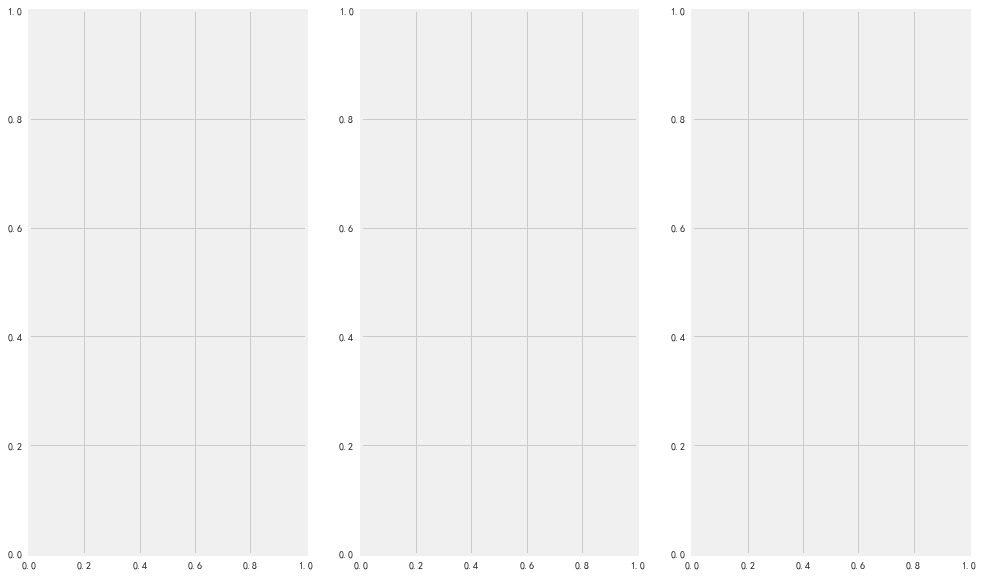

In [116]:
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(15,10))
df['楼层'] = df['楼层'].apply(pd.to_numeric) 
sns.countplot(df['楼层'],ax=ax1)
sns.barplot(x='楼层',y='总价',data=df,ax=ax2)
sns.boxplot(x='楼层',y='总价',data=df,ax=ax3)
plt.show()